In [ ]:
#Looping Graph

#Objectives:
# Implement looping logic to route the flow of data back to the nodes
# Create a single conditional edge to handle decision-making and control graph flow

#Main Goal: Coding up looping Logic


In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END # Framework that helps to design and manage the flow o teh tasks in application using a StateGraph

In [9]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [10]:
def adder(state: AgentState) -> AgentState:
    """This node adds 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node sibstract 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ This node will select next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    
    if state["operation"] == "-":
        return "subtraction_operation"

In [11]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) #passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

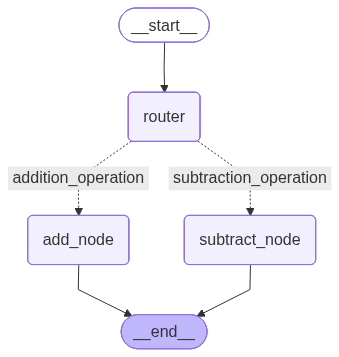

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"number1": 25, "operation": "+", "number2": 20})
print(result)

{'number1': 25, 'operation': '+', 'number2': 20, 'finalNumber': 45}
